<a href="https://colab.research.google.com/github/bitazyda/Heart-Disease-Model-Performance-Analytics/blob/main/_DS5G08_Bita_Azizy_Hamida_Model_Performance_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Library and Data

In [ ]:
#Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split,  StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#import data
df_origin = pd.read_csv('/content/drive/MyDrive/MSIB Batch 5/data/heart.csv')
df_origin

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Data Understanding

In [ ]:
df_origin.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df_origin.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
df_origin.shape

(1025, 14)

In [ ]:
df_origin.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df_origin.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [ ]:
# mengubah kolom menjadi kategorikal
ubah=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df_origin[ubah] = df_origin[ubah].astype(object)
df_origin.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object

In [ ]:
numerical_columns = df_origin.select_dtypes(include=['int', 'float'])

numerical_columns_head = numerical_columns.head()
numerical_columns_head

,age,trestbps,chol,thalach,oldpeak,target
0,52,125,212,168,1.0,0
1,53,140,203,155,3.1,0
2,70,145,174,125,2.6,0
3,61,148,203,161,0.0,0
4,62,138,294,106,1.9,0


In [ ]:
categorical_columns = df_origin.select_dtypes(include=['object'])

categorical_columns_head = categorical_columns.head()
categorical_columns_head

,sex,cp,fbs,restecg,exang,slope,ca,thal
0,1,0,0,1,0,2,2,3
1,1,0,1,0,1,0,0,3
2,1,0,0,1,1,0,0,3
3,1,0,0,1,0,2,1,3
4,0,0,1,1,0,1,3,2


In [ ]:
df_origin.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object

#Explaratory Data Analysis (EDA)

In [ ]:
cor_matrix = df_origin.corr()
cor_matrix

,age,trestbps,chol,thalach,oldpeak,target
age,1.000000,0.271121,0.219823,-0.390227,0.208137,-0.229324
trestbps,0.271121,1.000000,0.127977,-0.039264,0.187434,-0.138772
chol,0.219823,0.127977,1.000000,-0.021772,0.064880,-0.099966
thalach,-0.390227,-0.039264,-0.021772,1.000000,-0.349796,0.422895
oldpeak,0.208137,0.187434,0.064880,-0.349796,1.000000,-0.438441
target,-0.229324,-0.138772,-0.099966,0.422895,-0.438441,1.000000


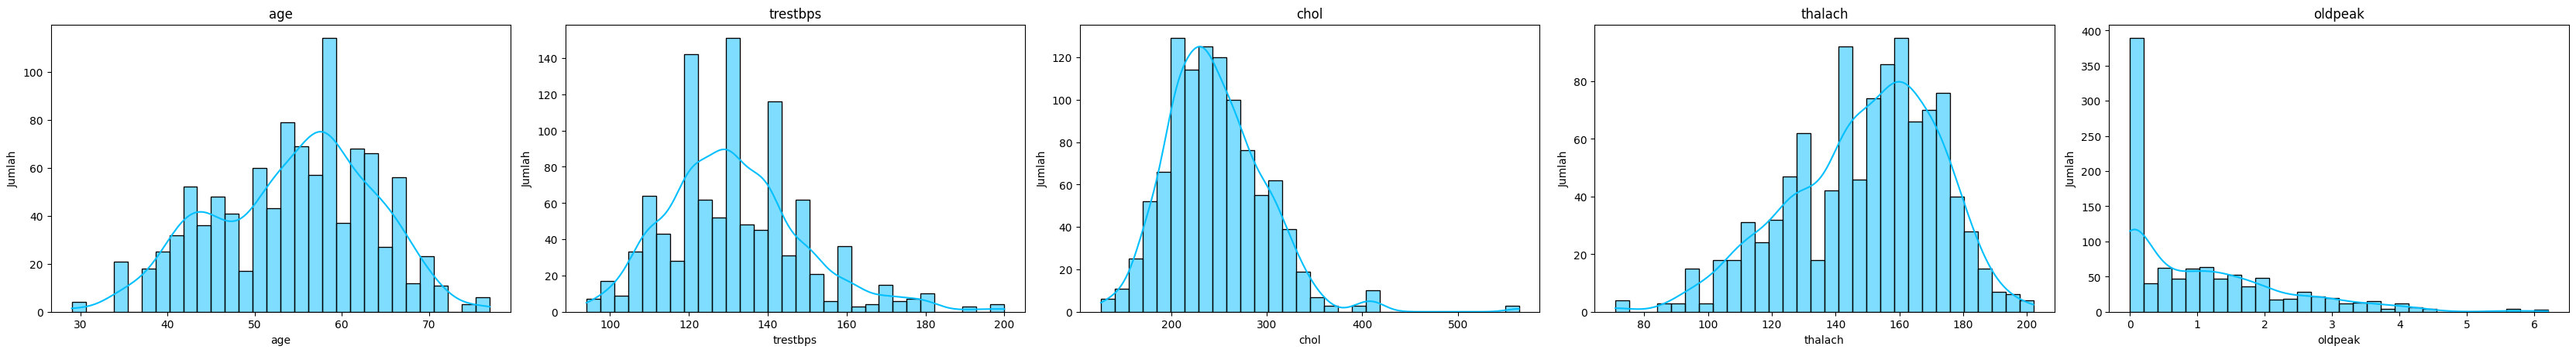

In [ ]:
#Visualisasi Distribusi Variabel Numerik
num_cols = numerical_columns.columns.drop(['target'])

plt.figure(figsize=(40,30))
n_rows = 7
n_cols = 6

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(df_origin[col], bins=30, color="deepskyblue", kde=True)
    plt.xlabel(col)
    plt.ylabel("Jumlah")
    plt.title(col)
    plt.grid(False)

plt.tight_layout()
plt.show()

<Axes: >

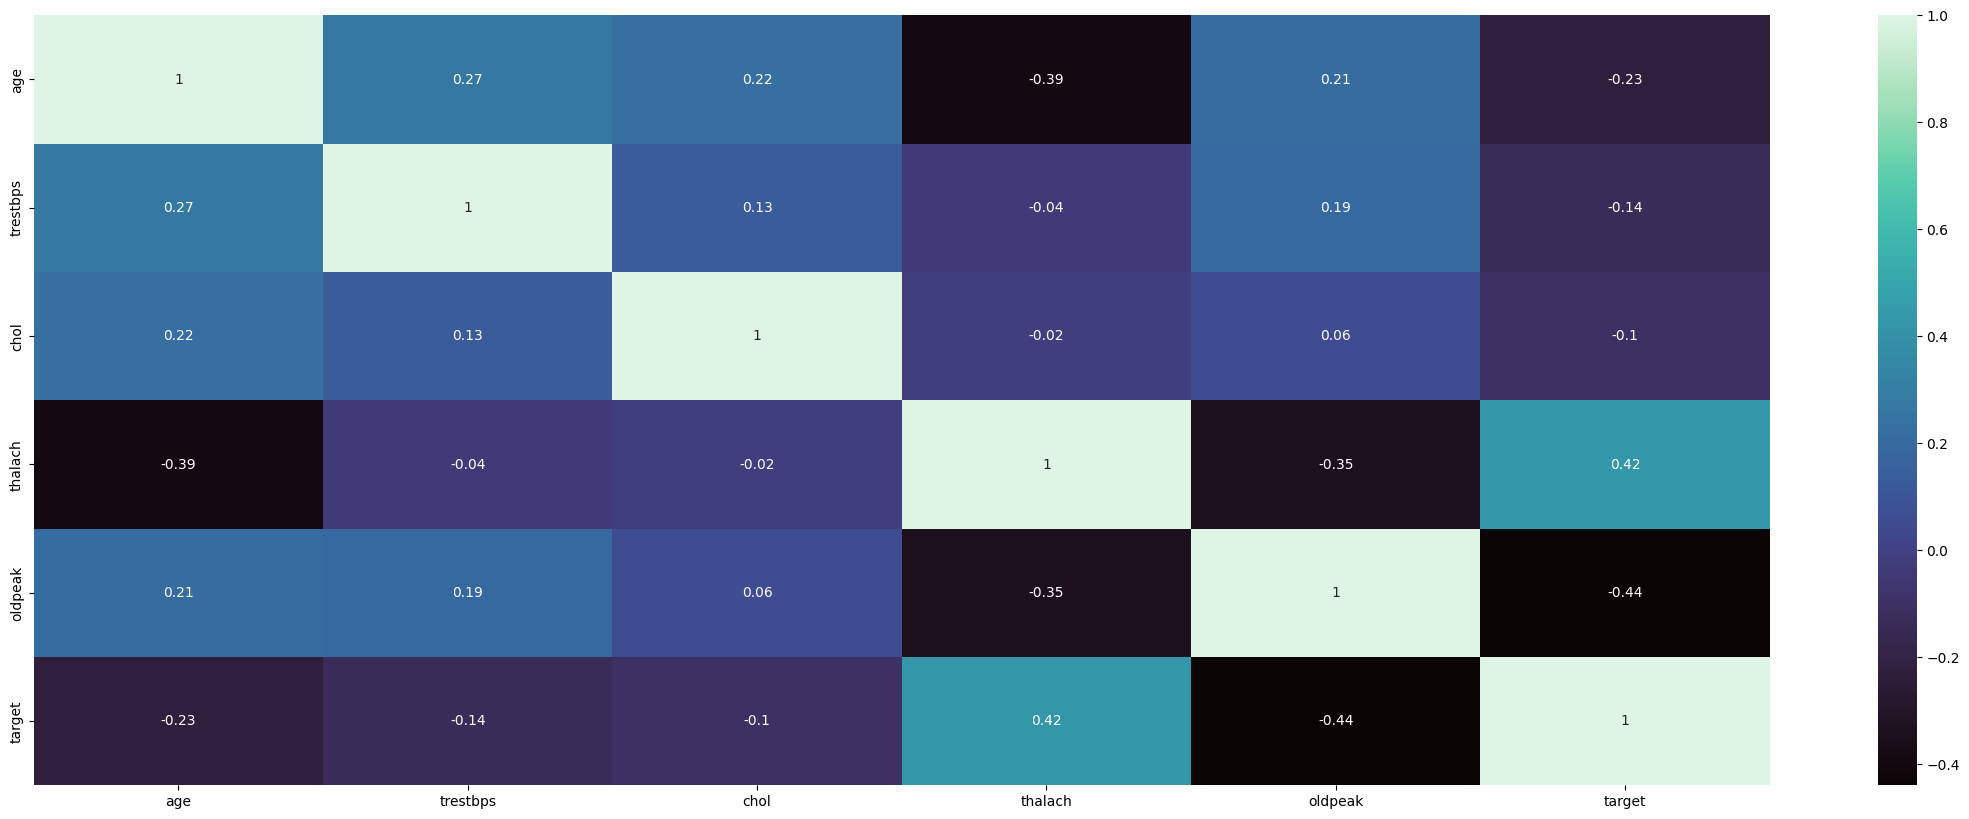

In [ ]:
# Matriks korelasi data numerik
num_correlation = numerical_columns

numerical_correlation = num_correlation.corr()
plt.figure(figsize = (28,10))
sns.heatmap(round(numerical_correlation,2),annot=True,cmap = 'mako')

In [ ]:
numerical_correlation['target'].sort_values(ascending=False)

target      1.000000
thalach     0.422895
chol       -0.099966
trestbps   -0.138772
age        -0.229324
oldpeak    -0.438441
Name: target, dtype: float64

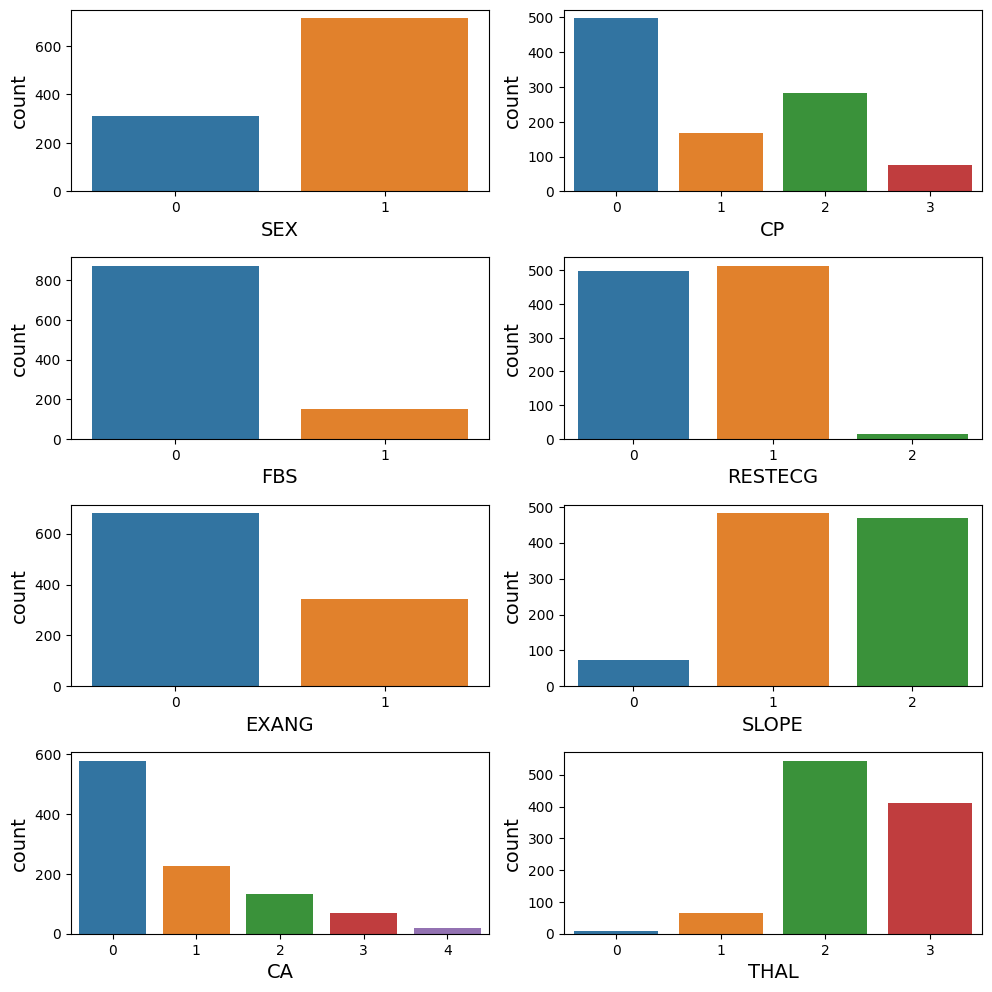

In [ ]:
# Visualisasi Distribusi Variabel Kategorikal
plt.figure(figsize=(10,10))
for index,column in enumerate(categorical_columns):
    plt.subplot(4,2,index+1)
    sns.countplot(data=categorical_columns,x=column)
    plt.xlabel(column.upper(),fontsize=14)
    plt.ylabel("count", fontsize=14)

plt.tight_layout(pad = 1.0)
plt.show()

<Axes: >

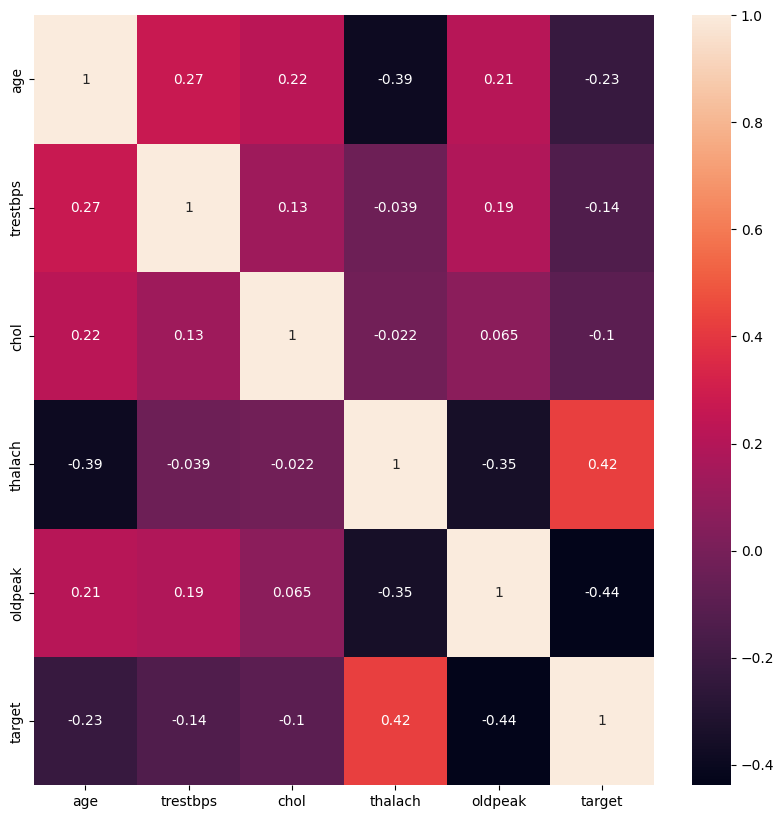

In [ ]:
# Memeriksa korelasi antar fitur
plt.figure(figsize=(10,10))
cor = df_origin.corr()
sns.heatmap(cor, annot=True)

# Data Preprocessing

 **a) Handling Missing Values**

In [ ]:
#Check missing values pada tiap variabel dalam dataset heart disease.csv
df_origin.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Check jumlah missing values
df_origin.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

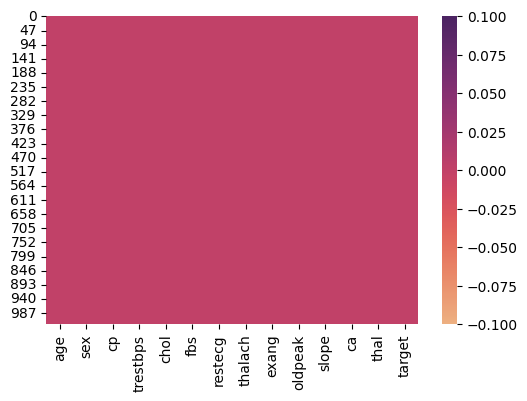

In [ ]:
# Check missing values menggunakan visualisasi heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df_origin.isnull(),cmap="flare")
plt.show()

Insight : Dari checking data dan juga heatmap diatas dapat diketahui bahwa dataset ini tidak memiliki missing values

**b) Handling Unnecesarry Columns/Rows**

In [ ]:
df_origin.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [ ]:
#drop baris yang ca=4 dan thal=0
df_origin=df_origin[df_origin['ca']!=4]
df_origin=df_origin[df_origin['thal']!=0]
df_origin.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
target        2
dtype: int64

Explanation :
*   ca: variabel ini merepresentasikan jumlah pembuluh darah utama (0-3) yang dicatat memiliki penyempitan lebih dari 50%
*   thal: variabel ini merepresentasikan hasil tes thalium scan dengan 3 nilai kategori yang mungkin:
1. thal 1: menunjukkan kondisi normal
2. thal 2: menunjukkan adanya defek tetap pada thalassemia
3. thal 3: menunjukkan adanya defek yang dapat dipulihkan pada thalassemia.

Karena data 'ca' = 5 tidak sesuai dengan definisi data seharusnya yakni 'ca' = 4 kategori, sehingga dilakukan drop data. Begitu juga pada data 'thal' = 4, karena seharusnya hanya memiliki 3 definisi, sehingga dilakukan drop data.






**c) Handling Duplicates Values**

In [ ]:
# Check duplikat data pada dataset
df_origin.loc[df_origin.duplicated(subset=["age","sex","cp","trestbps","chol","fbs","exang"])]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
df_origin.duplicated().sum()

704

In [ ]:
#Mengatasi duplikat data dengan menghapusnya
df_origin = df_origin.drop_duplicates()
df_origin.shape

(296, 14)

In [ ]:
#Check kembali dataset apakah duplikat data masih ada atau tidak
df_origin.duplicated().sum()

0

Insight : Dari hasil pengecekan dapat diketahui bahwa terdapat 704 data duplikat dalam dataset tersebut, dan setelah menghapusnya dan mengeceknya kembali sudah tidak ada lagi data yang duplikat

**d) Handling Outliers**

In [ ]:
df_origin.describe()

,age,trestbps,chol,thalach,oldpeak,target
count,296.000000,296.00000,296.000000,296.000000,296.000000,296.000000
mean,54.523649,131.60473,247.155405,149.560811,1.059122,0.540541
std,9.059471,17.72662,51.977011,22.970792,1.166474,0.499198
min,29.000000,94.00000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.00000,211.000000,133.000000,0.000000,0.000000
50%,56.000000,130.00000,242.500000,152.500000,0.800000,1.000000
75%,61.000000,140.00000,275.250000,166.000000,1.650000,1.000000
max,77.000000,200.00000,564.000000,202.000000,6.200000,1.000000


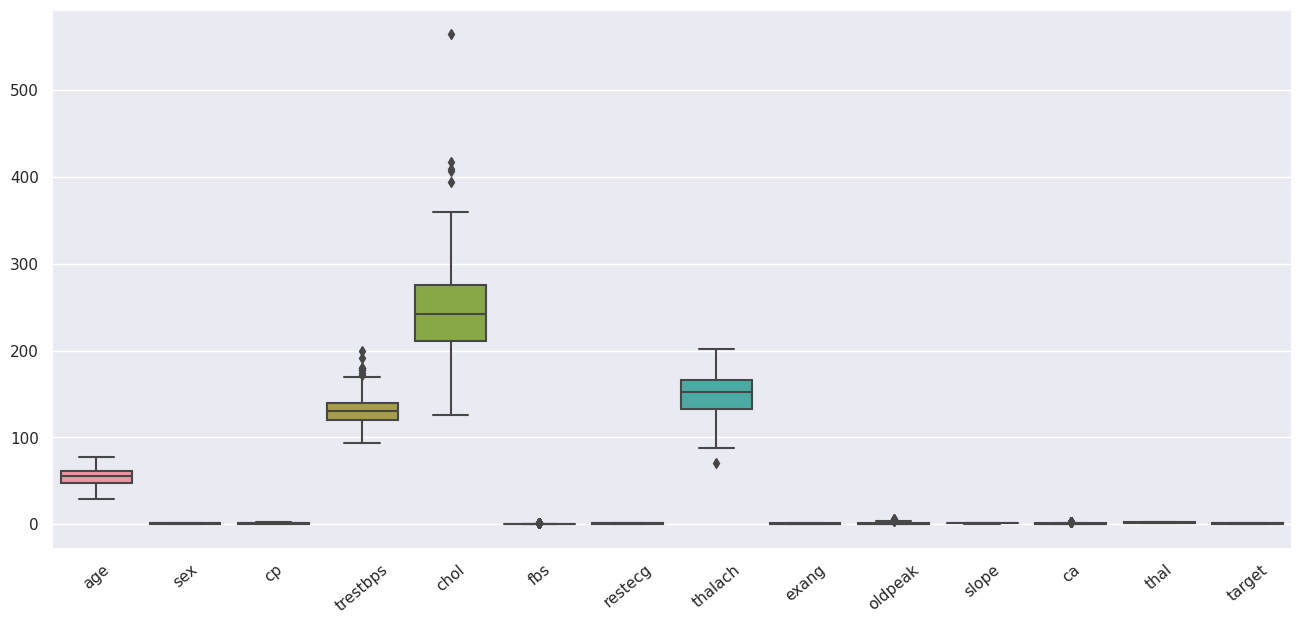

In [ ]:
#Check outlier pada dataset menggunakan visualisasi boxplot
sns.set(style="darkgrid", palette="muted")
fig, ax = plt.subplots(figsize=(16,7))
sns.boxplot(data = df_origin)
plt.xticks(rotation=40)
plt.show()

Insight : Dari dekripsi dapat diketahui bahwa nilai max yang memiliki selisih jauh dengan nilai mean serta dari gambar boxplot di atas, kolom yang terdapat outlier yaitu

* trestbps
* chol
* thalach
* oldpeak

In [ ]:
# Mendefinisikan variabel kontinu dan plot yang memiliki outlier
continous_features = ['trestbps','chol','thalach','oldpeak']
def outliers(data_out, drop = False):
    for each_feature in data_out.columns:
        feature_data = data_out[each_feature]
        Q1 = np.percentile(feature_data, 25.)
        Q3 = np.percentile(feature_data, 75.)
        IQR = Q3-Q1
        outlier_step = IQR * 1.5
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df_origin.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(df_origin[continous_features])

For the feature trestbps, No of Outliers is 9
For the feature chol, No of Outliers is 5
For the feature thalach, No of Outliers is 1
For the feature oldpeak, No of Outliers is 5


In [ ]:
# Menghapus outlier
outliers(df_origin[continous_features], drop = True)

Outliers from trestbps feature removed
Outliers from chol feature removed
Outliers from thalach feature removed
Outliers from oldpeak feature removed


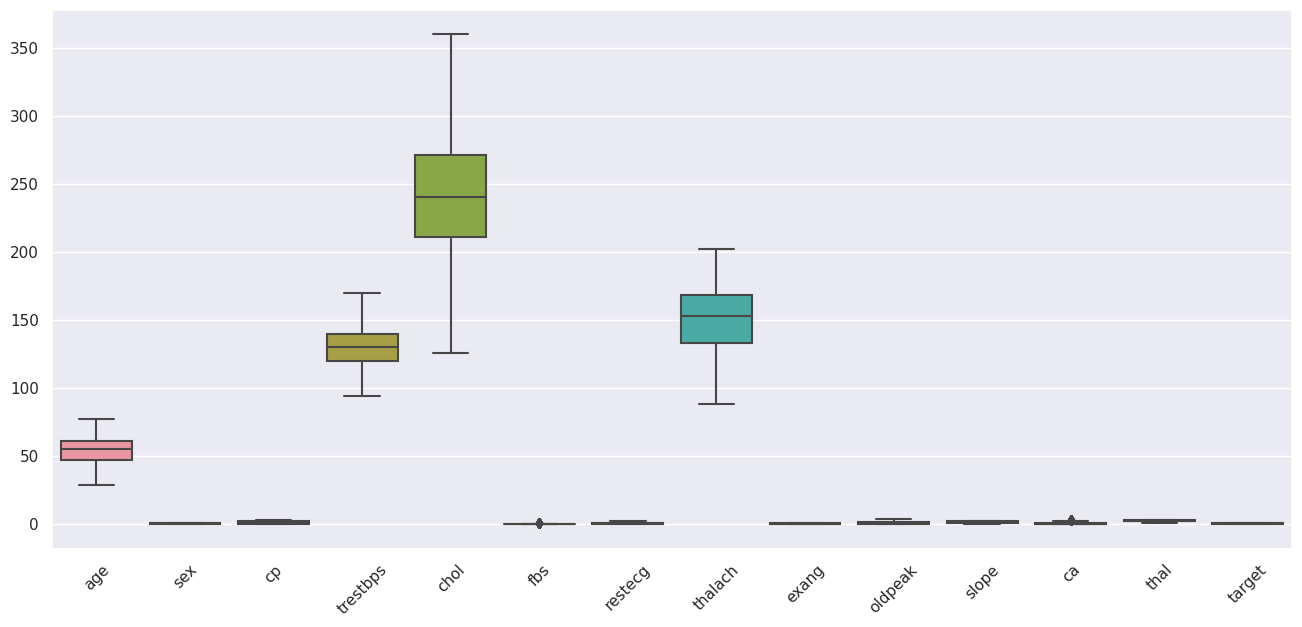

In [ ]:
#Check kembali apakah masih terdapat outlier atau tidak
sns.set(style="darkgrid", palette="muted")
fig, ax = plt.subplots(figsize=(16,7))
sns.boxplot(data = df_origin)
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_origin.shape

(277, 14)

**e) Handling Imbalanced Data**

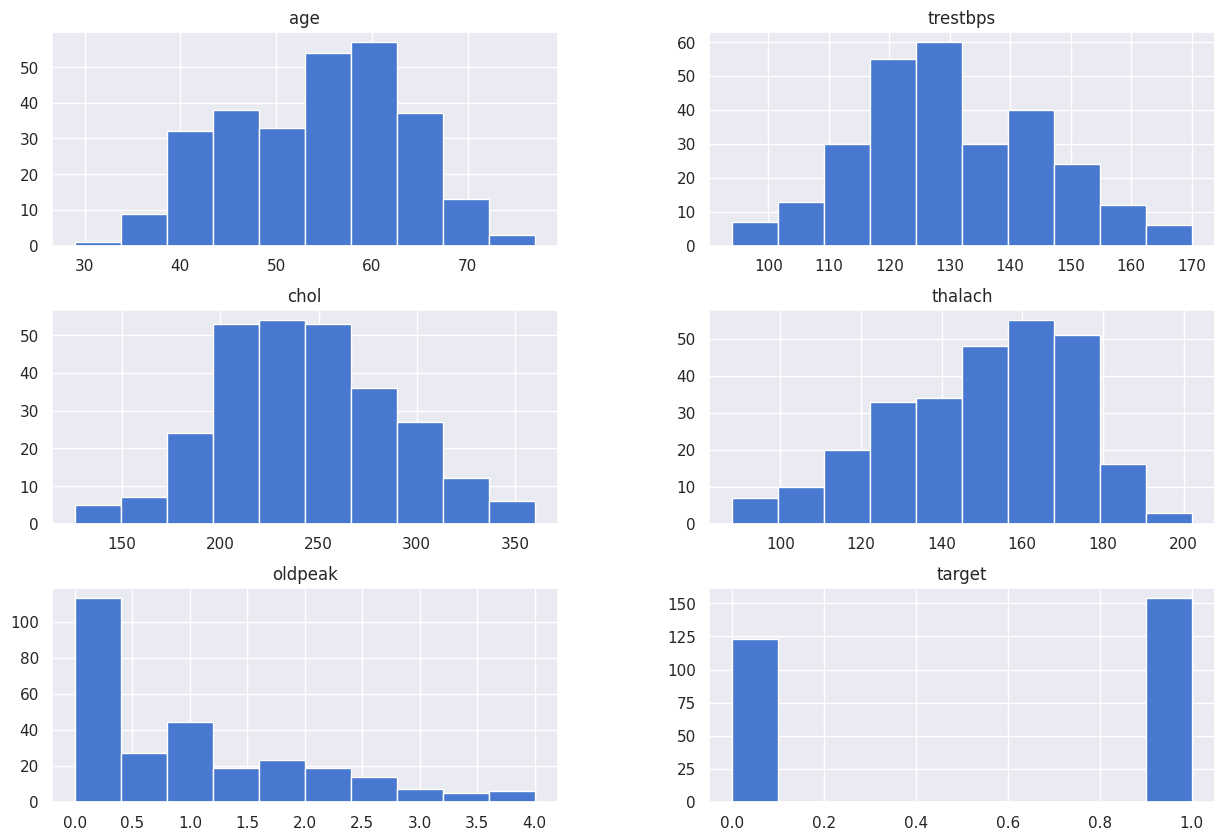

In [ ]:
# Check data yang tidak seimbang (imbalanced)
df_origin.hist(figsize=(15, 10), bins=10)
plt.show()

In [ ]:
#Menampilkan data yang tidak seimbang dari kolom target
class_counts = df_origin['target'].value_counts()
print(class_counts)

1    154
0    123
Name: target, dtype: int64


In [ ]:
!pip install imbalanced-learn

In [ ]:
pip list | grep imbalanced-learn

imbalanced-learn                 0.10.1


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Mengatasi imbalanced dara menggunakan teknik Oversampling
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(df_origin.drop('target', axis=1), df_origin['target'])

# Menggabungkan kolom target dengan data oversampling
df_smote = pd.concat([X_smote, y_smote], axis=1)

# Simpan ke dalam dataset baru
df_smote.to_csv('heart-disease-oversampled.csv', index=False)

In [ ]:
df_clean = pd.read_csv('heart-disease-oversampled.csv')
df_clean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1.0,0.000000,125,212,0.000000,1.000000,168,0.000000,1.000000,2.000000,2.000000,3.000000,0
1,53,1.0,0.000000,140,203,1.000000,0.000000,155,1.000000,3.100000,0.000000,0.000000,3.000000,0
2,70,1.0,0.000000,145,174,0.000000,1.000000,125,1.000000,2.600000,0.000000,0.000000,3.000000,0
3,61,1.0,0.000000,148,203,0.000000,1.000000,161,0.000000,0.000000,2.000000,1.000000,3.000000,0
4,62,0.0,0.000000,138,294,1.000000,1.000000,106,0.000000,1.900000,1.000000,3.000000,2.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,58,1.0,1.693118,162,279,0.435627,0.000000,124,0.000000,0.435627,1.564373,1.306882,2.435627,0
304,54,1.0,0.000000,122,278,0.000000,1.000000,95,1.000000,1.956973,1.000000,2.000000,3.000000,0
305,58,1.0,0.625212,124,259,0.000000,0.625212,141,0.374788,1.236969,1.625212,0.374788,3.000000,0
306,63,1.0,1.199089,127,317,0.400456,0.599544,131,1.000000,1.800000,1.400456,1.201367,3.000000,0


In [ ]:
class_counts = df_clean['target'].value_counts()
print(class_counts)

0    154
1    154
Name: target, dtype: int64


<Axes: xlabel='target', ylabel='count'>

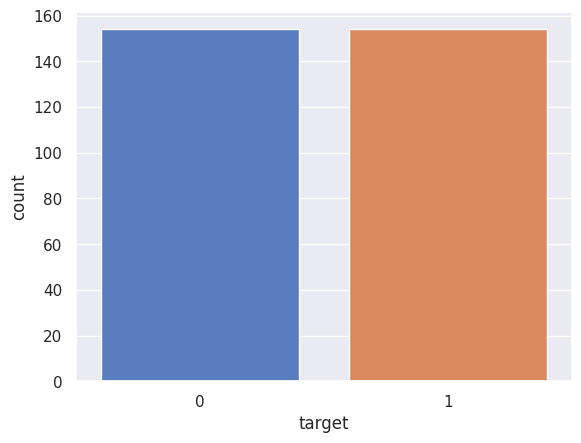

In [ ]:
sns.countplot(data=df_clean,x='target')

Insight : Dari hasil oversampling data dan juga barchart diatas, dapat dilihat bahwa data kolom target telah seimbang atau imbalanced data sudah teratasi

**f) Feature encoding**

In [ ]:
# One-hot encoding
data_encoded = pd.get_dummies(df_clean, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

# Label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_encoded['target'] = label_encoder.fit_transform(df_clean['target'])

In [ ]:
data_encoded.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0.0,sex_0.1286954440712953,sex_0.1625849502934467,sex_0.3507169129562691,...,thal_2.1695257795382106,thal_2.20403960994143,thal_2.350716912956269,thal_2.4114171183319426,thal_2.4356274737020227,thal_2.4522509026344457,thal_2.7426091118574094,thal_2.8183017213485857,thal_2.8378167316475817,thal_3.0
0,52,125,212,168,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_encoded['target'].head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

# Model Fitting

Model klasifikasi Machine Learning menggunakan model Decision Tree dan Random Forest, tiap model akan digunakan cross validation dan bootstraping.

Random Forest dan Decision Tree cocok untuk klasifikasi data heart disease dikarenakan dapat memetakan pola dan hubungan antara variabel, serta dapat memecah data menjadi subset yang lebih kecil untuk meningkatkan akurasi model

In [ ]:
MODEL = []
TEST = []
TRAIN = []
F1_SCORE = []
AUC = []
def result(model,test,train,f1,auc):
    MODEL.append(model)
    TEST.append(round(test,2))
    TRAIN.append(round(train,2))
    F1_SCORE.append(round(f1,2))
    AUC.append(round(auc,2))

In [ ]:
df_clean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1.0,0.0,125,212,0.0,1.0,168,0.0,1.0,2.0,2.0,3.0,0
1,53,1.0,0.0,140,203,1.0,0.0,155,1.0,3.1,0.0,0.0,3.0,0
2,70,1.0,0.0,145,174,0.0,1.0,125,1.0,2.6,0.0,0.0,3.0,0
3,61,1.0,0.0,148,203,0.0,1.0,161,0.0,0.0,2.0,1.0,3.0,0
4,62,0.0,0.0,138,294,1.0,1.0,106,0.0,1.9,1.0,3.0,2.0,0


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       308 non-null    int64  
 1   sex       308 non-null    float64
 2   cp        308 non-null    float64
 3   trestbps  308 non-null    int64  
 4   chol      308 non-null    int64  
 5   fbs       308 non-null    float64
 6   restecg   308 non-null    float64
 7   thalach   308 non-null    int64  
 8   exang     308 non-null    float64
 9   oldpeak   308 non-null    float64
 10  slope     308 non-null    float64
 11  ca        308 non-null    float64
 12  thal      308 non-null    float64
 13  target    308 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 33.8 KB


In [ ]:
df_clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,308.0,54.285714,9.123270,29.0,47.0,56.000000,61.0,77.0
sex,308.0,0.719617,0.448191,0.0,0.0,1.000000,1.0,1.0
cp,308.0,0.950485,1.019232,0.0,0.0,1.000000,2.0,3.0
trestbps,308.0,130.087662,15.730490,94.0,120.0,130.000000,140.0,170.0
chol,308.0,243.584416,44.984210,126.0,210.0,240.000000,274.0,360.0
fbs,308.0,0.139076,0.336393,0.0,0.0,0.000000,0.0,1.0
restecg,308.0,0.522102,0.504127,0.0,0.0,0.787076,1.0,2.0
thalach,308.0,148.629870,22.849729,88.0,132.0,152.000000,165.0,202.0
exang,308.0,0.328284,0.463918,0.0,0.0,0.000000,1.0,1.0
oldpeak,308.0,1.000961,1.030968,0.0,0.0,0.800000,1.6,4.0


In [ ]:
df_clean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**1) Model Random Forest**

In [ ]:
#Memisahkan Variabel 'Target'
X = df_clean.drop(['target'],axis=1)
y = df_clean['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print("Training Set - X_train shape:", X_train.shape)
print("Testing Set - X_test shape:", X_test.shape)
print("Training Set - y_train shape:", y_train.shape)
print("Testing Set - y_test shape:", y_test.shape)

Training Set - X_train shape: (215, 13)
Testing Set - X_test shape: (93, 13)
Training Set - y_train shape: (215,)
Testing Set - y_test shape: (93,)


In [ ]:
rf = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)
rf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=20, min_samples_split=15,
                       n_estimators=1000, random_state=1)

In [ ]:
rf_pred = rf.predict(X_test)
pd.DataFrame(np.c_[y_test,rf_pred],columns=['Actual','Predicted'])

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
88,1,1
89,1,1
90,1,1
91,0,0


Mean Absolute Error: 0.08602150537634409
R-squared: 0.653953488372093
Nilai Akurasi Model Random Forest: 91.39784946236558
Prediksi kelas:  [0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1
 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0]
Testing Accuracy  : 91.4 %
Training Accuracy : 91.63 %
Classification Report:               precision    recall  f1-score   support

           0       0.90      0.94      0.92        50
           1       0.93      0.88      0.90        43

    accuracy                           0.91        93
   macro avg       0.92      0.91      0.91        93
weighted avg       0.91      0.91      0.91        93



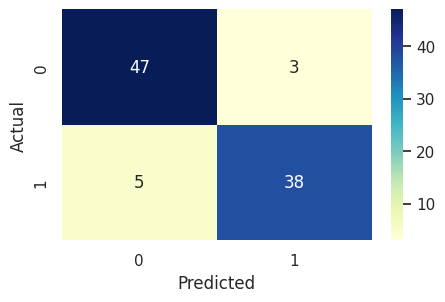

In [ ]:
rf_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)
RFAcc = accuracy_score(y_test, rf_pred)
classification_rep = classification_report(y_test, rf_pred)
rf_train = rf.score(X_train, y_train)*100
rf_test = rf.score(X_test, y_test)*100

print("Mean Absolute Error:", mae)
print("R-squared:", r2)
print("Nilai Akurasi Model Random Forest:", RFAcc*100)
print("Prediksi kelas: ", rf_pred)
print('Testing Accuracy  :',round(rf_test,2),"%")
print('Training Accuracy :',round(rf_train,2),"%")
print("Classification Report:", classification_rep)

plt.figure(figsize=(5,3))
data = confusion_matrix(y_test, rf_pred)
rf_con = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
sns.heatmap(rf_con, annot=True, fmt='g', cmap='YlGnBu')
f1 = metrics.f1_score(rf_pred, y_test)*100
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

***Learning Curve Random Forest***

In [ ]:
auc = roc_auc_score(y_test,rf_pred)
rf_auc = round(auc*100,2)
rf_auc

91.19

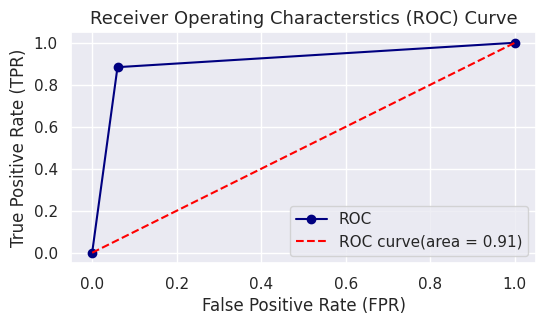

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,rf_pred)
plt.figure(figsize=(6,3))
plt.plot(fpr , tpr , color='navy', label='ROC',linestyle='-', marker='o')
plt.plot([0,1],[0,1],color = 'red',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characterstics (ROC) Curve', size=13)
plt.legend()
plt.show()

In [ ]:
result('Random Forest', rf_test, rf_train, f1, rf_auc)

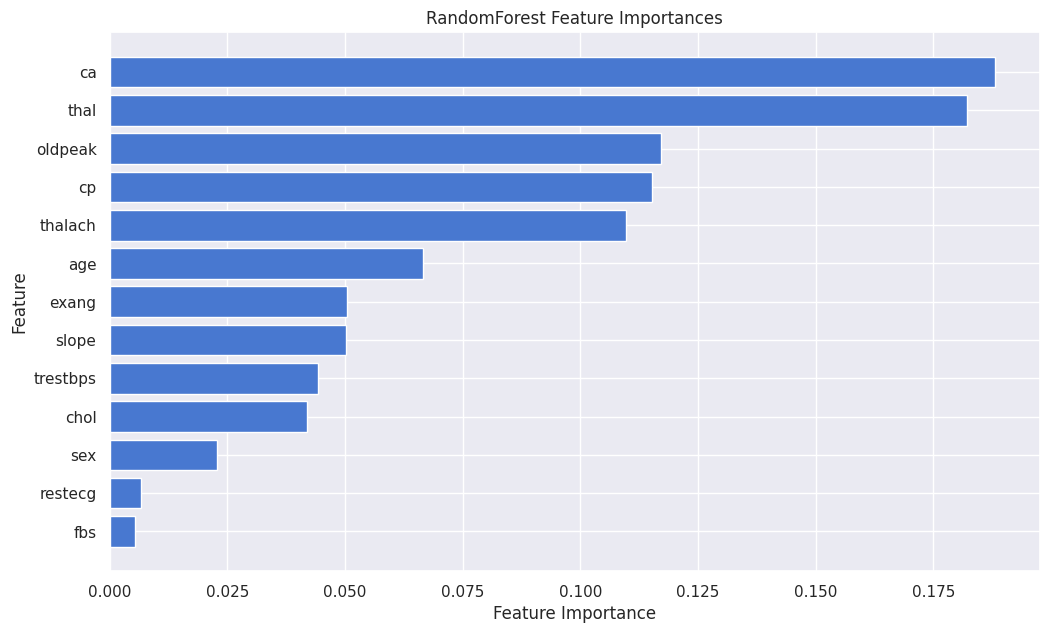

In [ ]:
#fitur importance menggunakan model Random Forest
feature_importances = rf.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(feature_importances)

plt.figure(figsize=(12, 7))
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices])
plt.yticks(range(len(sorted_indices)), np.array(feature_names)[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('RandomForest Feature Importances')
plt.show()

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

feature_importance = rf.feature_importances_

importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance':feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending = False)
importance_df

,Feature,Importance
11,ca,0.151966
12,thal,0.124150
9,oldpeak,0.117691
7,thalach,0.117397
2,cp,0.095705
4,chol,0.087694
0,age,0.087500
3,trestbps,0.071607
10,slope,0.050624
8,exang,0.040126


Insight: Setelah melakukan proses feature importance berdasarkan model random forest, dapat diketahui bahwa fitur 'ca' memiliki tingkat kepentingan paling tinggi diantara yang lain sehingga dapat disimpulkan bahwa faktor yang menjadi resiko terkena penyakit jantung tertinggi adalah jumlah pembuluh darah utama (0-3) yang terlihat pada pemeriksaan flourosopi.


**2) Model Decision Tree**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print("Training Set - X_train shape:", X_train.shape)
print("Testing Set - X_test shape:", X_test.shape)
print("Training Set - y_train shape:", y_train.shape)
print("Testing Set - y_test shape:", y_test.shape)

Training Set - X_train shape: (215, 13)
Testing Set - X_test shape: (93, 13)
Training Set - y_train shape: (215,)
Testing Set - y_test shape: (93,)


In [ ]:
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='entropy', min_samples_split=5,
                                       splitter='random', random_state=1)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt_pred = dt.predict(X_test)
pd.DataFrame(np.c_[y_test,dt_pred],columns=['Actual','Predicted'])

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,1
4,0,1
...,...,...
88,1,1
89,1,1
90,1,1
91,0,0


Mean Absolute Error: 0.24731182795698925
R-squared: 0.005116279069767415
Nilai Akurasi Decision Tree: 75.26881720430107
Prediksi kelas:  [0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1
 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0
 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0]
Testing Accuracy: 75.27 %
Training Accuracy: 100.0 %
Classification Report:               precision    recall  f1-score   support

           0       0.76      0.78      0.77        50
           1       0.74      0.72      0.73        43

    accuracy                           0.75        93
   macro avg       0.75      0.75      0.75        93
weighted avg       0.75      0.75      0.75        93



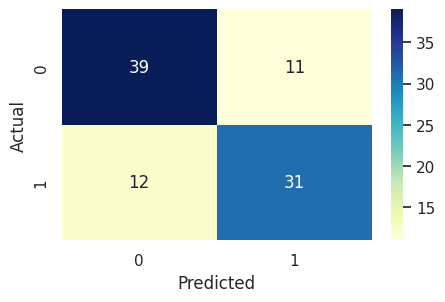

In [ ]:
dt_pred = dt.predict(X_test)
mae = mean_absolute_error(y_test, dt_pred)
r2 = r2_score(y_test, dt_pred)
DTAcc = accuracy_score(y_test, dt_pred)
classification_rep = classification_report(y_test, dt_pred)
dt_train = dt.score(X_train, y_train)*100
dt_test = dt.score(X_test, y_test)*100

print("Mean Absolute Error:", mae)
print("R-squared:", r2)
print("Nilai Akurasi Decision Tree:", DTAcc*100)
print("Prediksi kelas: ", dt_pred)
print('Testing Accuracy:',round(dt_test,2),"%")
print('Training Accuracy:',round(dt_train,2),"%")
print("Classification Report:", classification_rep)

plt.figure(figsize=(5,3))
data = confusion_matrix(y_test, dt_pred)
dt_con = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
sns.heatmap(dt_con, annot=True, fmt='g',cmap="YlGnBu")
f1 = metrics.f1_score(dt_pred, y_test)*100
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

***Learning Curve Decision Tree***

In [ ]:
auc= roc_auc_score(y_test,dt_pred)
dt_auc = round(auc*100,2)
dt_auc

75.05

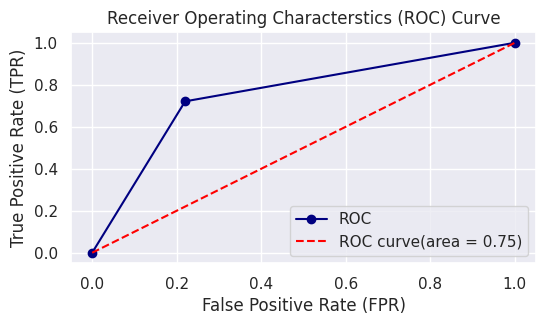

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,dt_pred)
plt.figure(figsize=(6,3))
plt.plot(fpr , tpr , color='navy',label='ROC',marker='o')
plt.plot([0,1],[0,1],color = 'red',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characterstics (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
result('Decision Tree', dt_test, dt_train, f1, dt_auc)

In [ ]:
#fitur importance menggunakan model Decision Tree
x = df_clean.drop('target', axis=1)
y = df_clean['target']

model = DecisionTreeClassifier()
model.fit(X, y)

importance = model.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

     Feature  Importance
12      thal    0.323514
11        ca    0.162452
9    oldpeak    0.112274
2         cp    0.090322
0        age    0.079920
4       chol    0.077753
3   trestbps    0.059422
7    thalach    0.052658
1        sex    0.023655
10     slope    0.015152
8      exang    0.002878
5        fbs    0.000000
6    restecg    0.000000


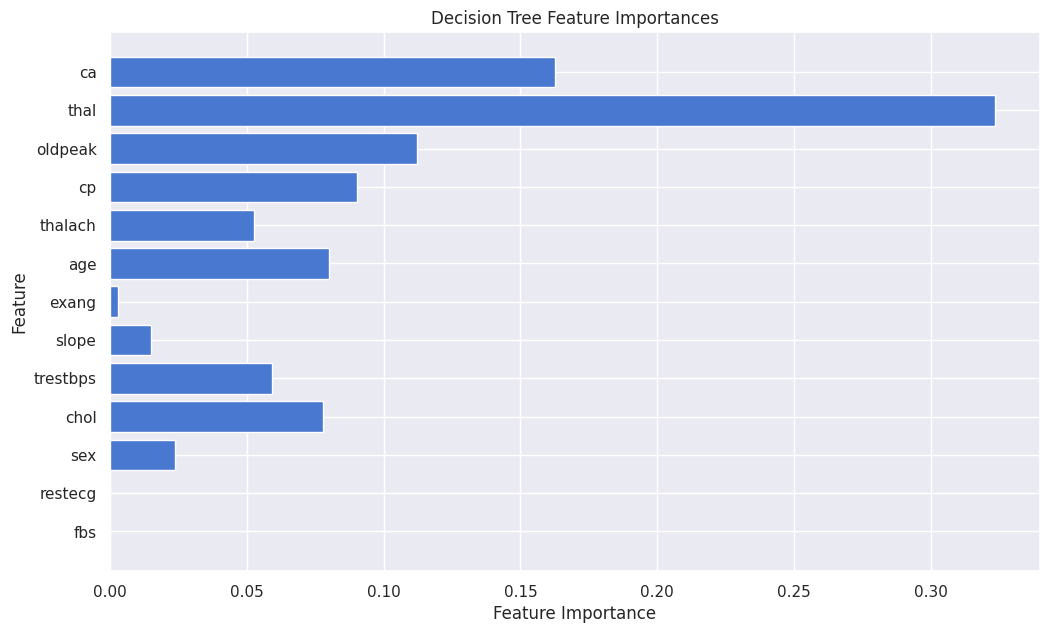

In [ ]:
plt.figure(figsize=(12, 7))
plt.barh(range(len(sorted_indices)), importance[sorted_indices])
plt.yticks(range(len(sorted_indices)), np.array(feature_names)[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importances')
plt.show()

Insight: Setelah melakukan proses feature importance berdasarkan model decision trea, dapat diketahui bahwa fitur 'thal' memiliki tingkat kepentingan paling tinggi diantara yang lain sehingga dapat disimpulkan bahwa faktor yang menjadi resiko terkena penyakit jantung tertinggi adalah hasil tes thalium scan (1-3).


# Model Comparison and Evaluation

In [ ]:
results = pd.DataFrame({ 'Models': MODEL,
                         'Testing Accuracy': TEST,
                         'Training Accuracy': TRAIN,
                         'F1_Score': F1_SCORE,
                         'AUC_Score': AUC})
results

,Models,Testing Accuracy,Training Accuracy,F1_Score,AUC_Score
0,Random Forest,91.40,91.63,90.48,91.19
1,Decision Tree,75.27,100.00,72.94,75.05


In [ ]:
 #Create Accuracy Comparison Model
compare = pd.DataFrame({'Model': ['Decision Tree', 'Random Forest'
                                  ],
                        'Accuracy': [ DTAcc*100, RFAcc*100,
                                     ]})

#Create Accuracy Comparison Model
compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Arial'})

Model,Accuracy
Random Forest,91.397849
Decision Tree,75.268817


# Hyperparameter Tuning, Grid Search, & Cross Validation

In [ ]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             ]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}


rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

classifier_param = [dt_param_grid,
                   rf_param_grid,
                   ]

In [ ]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_ * 100)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
79.95670995670994
Fitting 10 folds for each of 54 candidates, totalling 540 fits
84.19913419913418


*Perbandingan Antar Klasifikasi*

Text(0.5, 1.0, 'Cross Validation Scores')

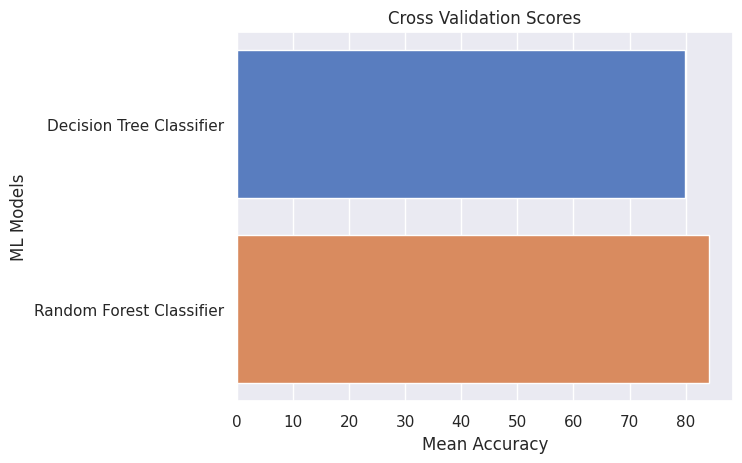

In [ ]:
cv_results = pd.DataFrame({"Cross Validation Means": cv_result, "ML Models": ["Decision Tree Classifier", "Random Forest Classifier"]})

g = sns.barplot(x="Cross Validation Means", y="ML Models", data=cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

# Ensambled Models

In [ ]:
votingC = VotingClassifier(estimators = [("rf",rf), ("dt", dt)],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(X_train, y_train)
print("Accuracy of Ensemble: {:.2f}".format(accuracy_score(votingC.predict(X_test),y_test)*100))

Accuracy of Ensemble: 79.57


*Membuat model tanpa menggunakan parameter grid untuk melihat seberapa besar perubahan hasilnya*

In [ ]:
best_accuracies_each_classes = {}
rf = RandomForestClassifier(n_estimators = 500, random_state = 1)
rf.fit(X_train,y_train)

best_accuracies_each_classes["Random Forest"] = rf.score(X_test,y_test)*100
print("Nilai akurasi terbaru dari model Random Forest : {:.2f}".format(rf.score(X_test,y_test)*100))

Nilai akurasi terbaru dari model Random Forest : 89.25


In [ ]:
best_accuracies_each_classes = {}
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

best_accuracies_each_classes["Decision Tree"] = dt.score(X_test,y_test)*100
print("Nilai akurasi terbaru dari model Decision Tree: {:.2f}".format(dt.score(X_test,y_test)*100))

Nilai akurasi terbaru dari model Decision Tree: 74.19


# Bootstrapping

In [ ]:
from sklearn.utils import resample

n_bootstraps = 100
accuracies = []
for i in range(n_bootstraps):
    # Ambil sampel data dengan penggantian
    x_boost, y_boost = resample(X_train, y_train)
    #  Latih model pada sampel bootstrap
    rf.fit(x_boost, y_boost)
    # Evaluasi model pada seluruh dataset
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Hitung rata-rata dan interval kepercayaan dari akuras
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
lower_ci = mean_accuracy - 1.96 * std_accuracy
upper_ci = mean_accuracy + 1.96 * std_accuracy

# Hasil Bootstrapping
print("Mean akurasi Random Forest dengan bootstrapping: %.2f" % mean_accuracy)
print("95%% confidence interval: [%.2f, %.2f]" % (lower_ci, upper_ci))

Mean akurasi Random Forest dengan bootstrapping: 0.87
95% confidence interval: [0.82, 0.92]


In [ ]:
n_bootstraps = 100
accuracies = []
for i in range(n_bootstraps):
    # Ambil sampel data dengan penggantian
    x_boost, y_boost = resample(X_train, y_train)
    #  Latih model pada sampel bootstrap
    dt.fit(x_boost, y_boost)
    # Evaluasi model pada seluruh dataset
    y_pred = dt.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Hitung rata-rata dan interval kepercayaan dari akuras
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
lower_ci = mean_accuracy - 1.96 * std_accuracy
upper_ci = mean_accuracy + 1.96 * std_accuracy

# Hasil Bootstrapping
print("Mean akurasi Decision Tree dengan bootstrapping: %.2f" % mean_accuracy)
print("95%% confidence interval: [%.2f, %.2f]" % (lower_ci, upper_ci))

Mean akurasi Decision Tree dengan bootstrapping: 0.77
95% confidence interval: [0.67, 0.86]
